In [ ]:
# Task 4 : Spam SMS Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [3]:
spam=pd.read_csv(r"C:\Machine Learning Intership\Task4\spam.csv",encoding="latin-1",usecols=['v1','v2'])

In [4]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
spam.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
spam.columns=['label','message']

In [9]:
spam.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


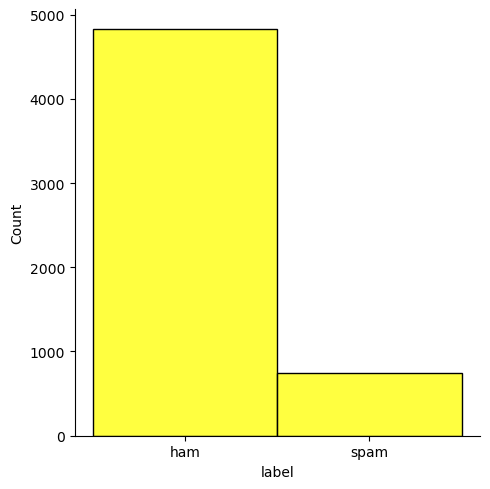

In [10]:
sns.displot(spam.label,color='yellow')

In [11]:
encode=LabelEncoder()
spam['label']=encode.fit_transform(spam["label"].values)

In [12]:
spam.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
vectorizer=TfidfVectorizer()

In [14]:
X=vectorizer.fit_transform(spam["message"])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
y=spam["label"]

In [16]:
X.shape

(5572, 8672)

In [17]:
y.shape

(5572,)

In [18]:
spam.count()

label      5572
message    5572
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)
y_pred_nb=nb_model.predict(X_test)
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred_nb))
print("classification report:\n",classification_report(y_test,y_pred_nb))
print("Accuracy:",accuracy_score(y_test,y_pred_nb))

confusion_matrix:
 [[965   0]
 [ 42 108]]
classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Accuracy: 0.9623318385650225


In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

confusion_matrix:
 [[965   0]
 [ 42 108]]
classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Accuracy: 0.9623318385650225


In [23]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

confusion_matrix:
 [[965   0]
 [ 26 124]]
classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.9766816143497757


In [24]:
results=pd.DataFrame({
    'model':['Navie Bayes','Logistic Regression','Support Vector Machine'],
    'score':[0.96,0.96,0.97]})
result_spam=results.sort_values(by='score',ascending=False)
result_spam=result_spam.set_index('score')
result_spam.head()

,model
score,
0.97,Support Vector Machine
0.96,Navie Bayes
0.96,Logistic Regression
